In [285]:
#import libraries
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
#Open the dataset
titanic = pd.read_csv('train.csv')


In [287]:
#Shape
titanic.shape

(891, 12)

In [288]:
#check dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
#listing down the columns
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Catagorical Column
- Survived
- Pclass
- Sex
- SibSp
- Parch
- Embarked

# Numerical Column
- Age
- Fare
- PassengerId

# Mixed Column
- Name
- Ticket
- Cabin

In [290]:
#Info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [291]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Few Conclusion
- Missing values in Age, Cabin and Embarked column
- 70% data is missing in Cabin Column, so we have to drop it.
- Few column have incorrect data types.

In [292]:
#drop the cabin column.
titanic.drop(columns=['Cabin'],inplace=True)

In [293]:
#imputing missing values for age
# Stratetegy - mean
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [294]:
#imputing missing values for embarked
# finding the most appeared value in embarked column
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [295]:
titanic['Embarked'].fillna('S',inplace=True)

In [296]:
#Want to check one more thing 
# Should i change the SibSp  and Parch to catagories

titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [297]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Changing data type of following column 
- Survived (C)
- PClass (C)
- Sex (C)
- Age (I)
- Embarked (C)

In [298]:
titanic['Survived']=titanic['Survived'].astype('category')
titanic['Pclass']=titanic['Pclass'].astype('category')
titanic['Sex']=titanic['Sex'].astype('category')
titanic['Embarked']=titanic['Embarked'].astype('category')
titanic['Age']=titanic['Age'].astype('int')


In [299]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [300]:
#5 Point Summary
titanic.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [301]:
#Univariate Analysis (Target column analysis)
# Survival Col
death_percent = round((titanic['Survived'].value_counts().values[0]/891)*100)
#the people death in accident
print('the % of death ratio is {}'.format(death_percent))

the % of death ratio is 62


In [302]:
# Pclass column
p_class = round((titanic['Pclass'].value_counts()/891)*100)
p_class

3    55.0
1    24.0
2    21.0
Name: Pclass, dtype: float64

In [303]:
#SEx  Column
sex_c = round((titanic['Sex'].value_counts()/891)*100)
sex_c

male      65.0
female    35.0
Name: Sex, dtype: float64

In [304]:
Embarked =  round((titanic['Embarked'].value_counts()/891)*100)
Embarked

S    73.0
C    19.0
Q     9.0
Name: Embarked, dtype: float64

In [305]:
Sibsp =  round((titanic['SibSp'].value_counts()/891)*100)
Sibsp

0    68.0
1    23.0
2     3.0
4     2.0
3     2.0
8     1.0
5     1.0
Name: SibSp, dtype: float64

0.45956263424701577

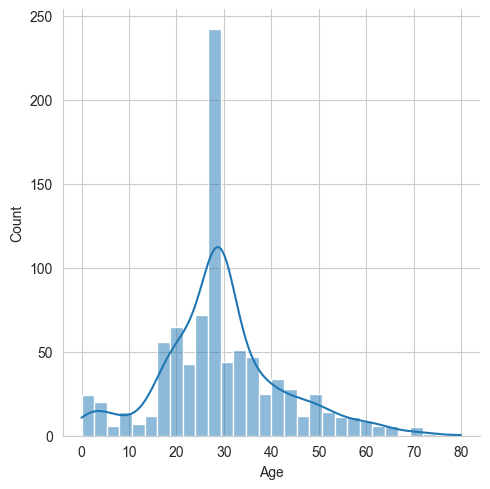

In [306]:
#Age column
sns.displot(titanic['Age'],kde=True)
titanic['Age'].skew()


In [307]:
titanic['Age'].kurt()

0.9865867453652877

<AxesSubplot: >

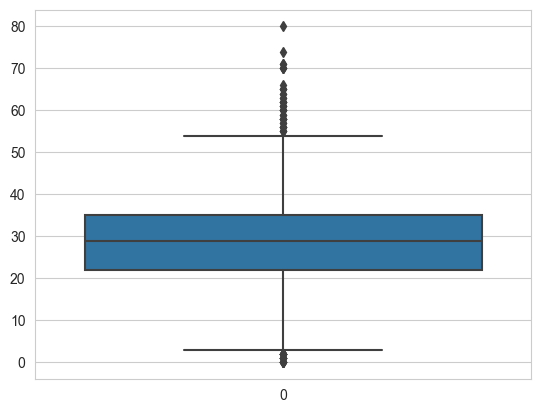

In [308]:
sns.boxplot(titanic['Age'])

In [309]:
print('People in the age between 60 and 70 are', titanic[(titanic['Age']>60) & (titanic['Age']<70)].shape[0] )
print('People in the age between 70 and 75 are', titanic[(titanic['Age']>70) & (titanic['Age']<75)].shape[0] )
print('People with the age greater 75 are', titanic[titanic['Age']>75].shape[0])

print("-"*50)

print('People with the age between 0 and 1 are' ,titanic[titanic['Age']<1].shape[0])

People in the age between 60 and 70 are 15
People in the age between 70 and 75 are 3
People with the age greater 75 are 1
--------------------------------------------------
People with the age between 0 and 1 are 7


# Conclusion 
- For all practical purposes age can be considered as normal distribution
- Deeper analysis req for outlier detection

4.787316519674893

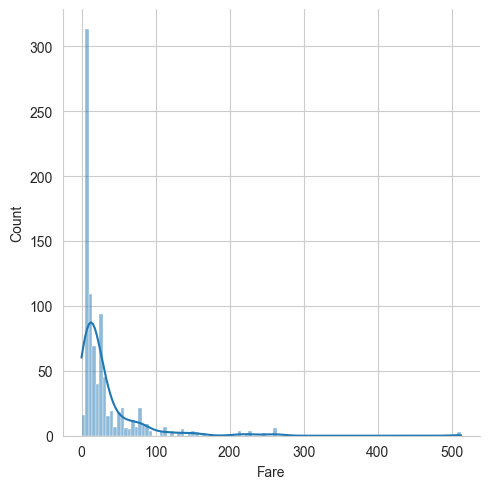

In [310]:
#Fare Analysis
sns.displot(titanic['Fare'],kde=True)
titanic['Fare'].skew()

In [311]:
titanic['Fare'].kurt()

33.39814088089868

<AxesSubplot: >

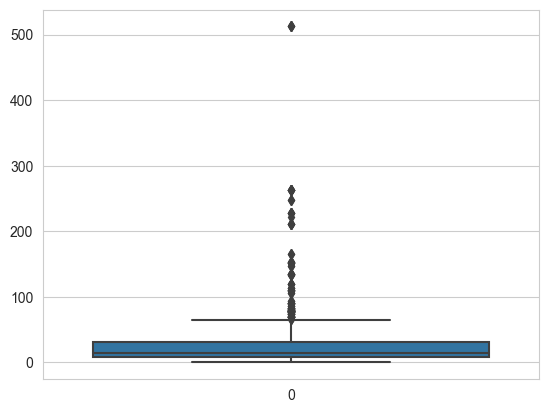

In [312]:
sns.boxplot(titanic['Fare'])

In [313]:
print('Peaople with fare between $200 to $300 = ',titanic[(titanic['Fare']>200) & (titanic['Fare']<300)].shape[0] )
print('Peaople with fare between $200 to $300 = ',titanic[titanic['Fare']>300].shape[0] )

Peaople with fare between $200 to $300 =  17
Peaople with fare between $200 to $300 =  3


# Conclusion
- Highly skewed data a lot of people buy cheaper tickets
- Outliers are there in the data 

In [314]:
# Multivariate Analysis
# Survival with Pclass

from matplotlib.pyplot import axis

pd.crosstab(titanic['Pclass'],titanic['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1)

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [315]:
# Survival Vs Sex
pd.crosstab(titanic['Sex'],titanic['Survived']).apply(lambda x : round((x/x.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


In [316]:
# Survival vs Embarked
pd.crosstab([titanic['Embarked']],titanic['Survived']).apply(lambda x : round((x/x.sum())*100,1),axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


<Figure size 1500x600 with 0 Axes>

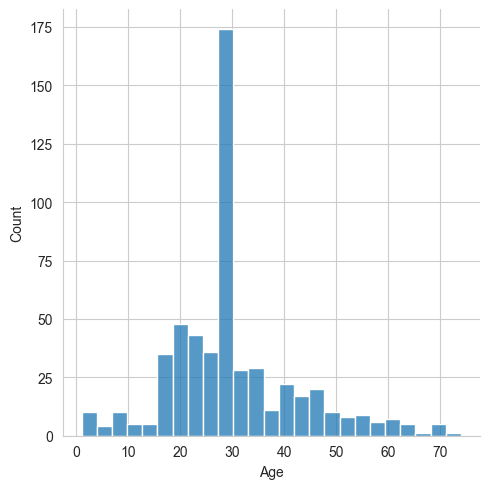

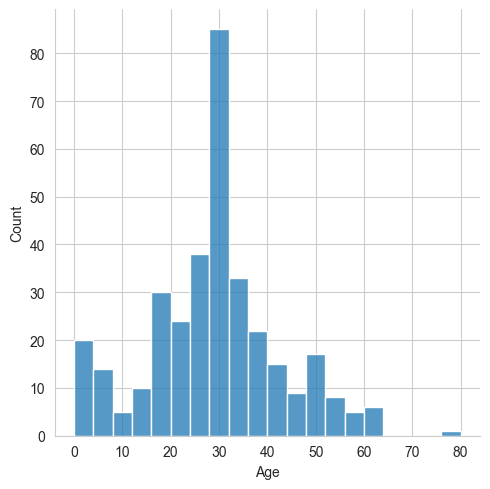

In [317]:
# Survival with age
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.displot(titanic[titanic['Survived']==0]['Age']),
sns.displot(titanic[titanic['Survived']==1]['Age'])

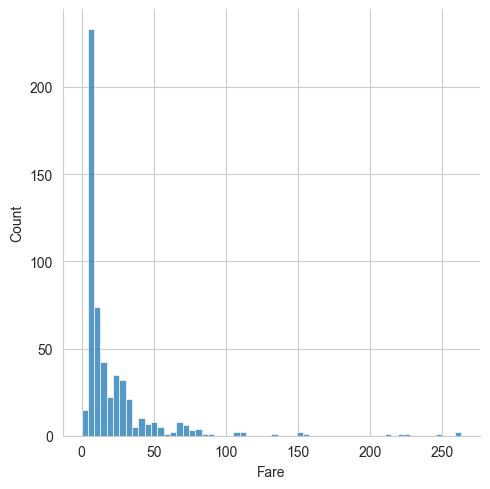

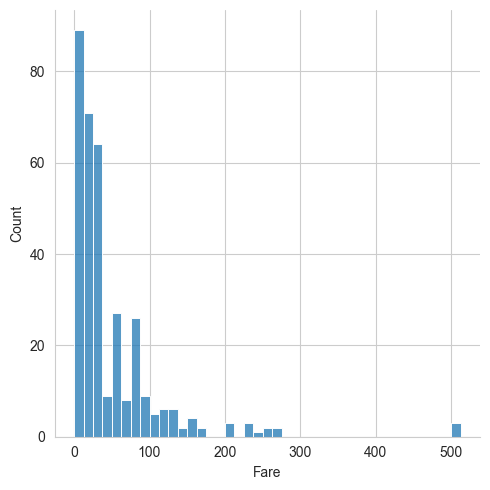

In [318]:
# Survival with Fare
sns.set_style("whitegrid")
sns.displot(titanic[titanic['Survived']==0]['Fare'])
sns.displot(titanic[titanic['Survived']==1]['Fare'])


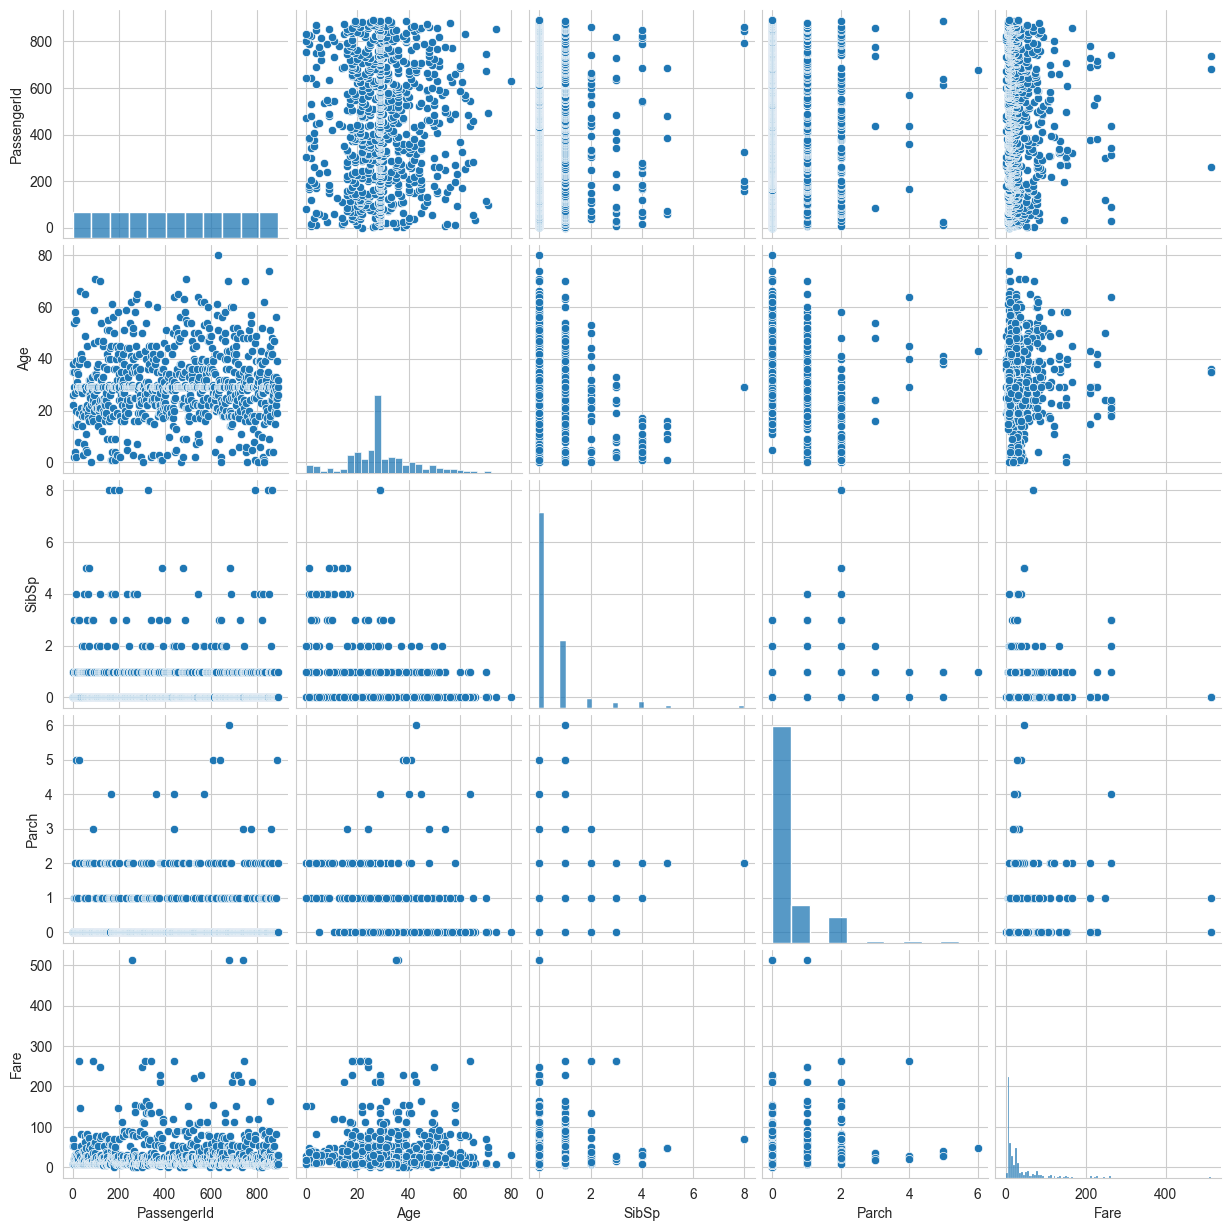

In [319]:
sns.pairplot(titanic)

C:\Users\Codanics\AppData\Local\Temp\ipykernel_17600\488378918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr())


<AxesSubplot: >

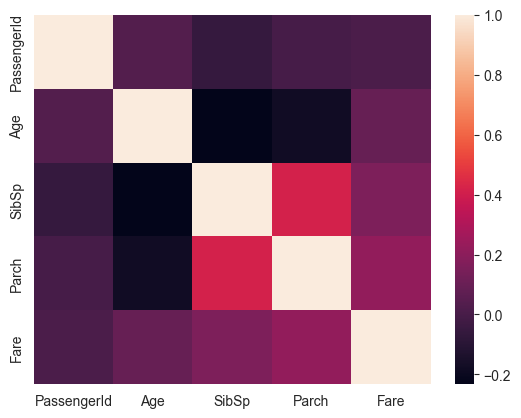

In [320]:
sns.heatmap(titanic.corr())

In [321]:
# Feature Engineering
# Create separate column for Sibsp and parch to better analysis

titanic['family_Size']=titanic['Parch']+ titanic['SibSp']


In [322]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_Size
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,4,2,347082,31.2750,S,6
731,732,0,3,"Hassan, Mr. Houssein G N",male,11,0,0,2699,18.7875,C,0
487,488,0,1,"Kent, Mr. Edward Austin",male,58,0,0,11771,29.7000,C,0
346,347,1,2,"Smith, Miss. Marion Elsie",female,40,0,0,31418,13.0000,S,0
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18,0,1,392091,9.3500,S,1


In [323]:
# Now we will appear a new feature by the name of family type
import re


def famil_type(number):
    if number==0:
        return 'Alone'
    elif number > 0 and number <= 4:
        return 'Medium'
    else:
        return 'Large'

In [324]:
titanic['famil_type']=titanic['family_Size'].apply(famil_type)

In [325]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_Size,famil_type
253,254,0,3,"Lobb, Mr. William Arthur",male,30,1,0,A/5. 3336,16.100,S,1,Medium
293,294,0,3,"Haas, Miss. Aloisia",female,24,0,0,349236,8.850,S,0,Alone
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.075,S,4,Medium
711,712,0,1,"Klaber, Mr. Herman",male,29,0,0,113028,26.550,S,0,Alone
368,369,1,3,"Jermyn, Miss. Annie",female,29,0,0,14313,7.750,Q,0,Alone


In [326]:
#drop table sibsp, parch amd famil_Size
titanic.drop(columns=['SibSp','Parch','family_Size'],inplace=True)

In [327]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,famil_type
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45,111428,26.5500,S,Alone
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29,CA. 2343,69.5500,S,Large
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29,24160,211.3375,S,Alone
869,870,1,3,"Johnson, Master. Harold Theodor",male,4,347742,11.1333,S,Medium
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18,231945,11.5000,S,Alone


In [328]:
pd.crosstab(titanic['famil_type'],titanic['Survived']).apply(lambda x : round((x/x.sum())*100,1),axis=1)

Survived,0,1
famil_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [329]:
# HAandling Outlier In Age
titanic=titanic[titanic['Age']<titanic["Age"].mean() + 3 * titanic['Age'].std()]

In [330]:
titanic.shape

(884, 10)

In [335]:
# Handling FAre col outliers
# Finding Quartiles
Q1 = np.percentile(titanic['Fare'],25)
Q3 = np.percentile(titanic['Fare'],75)

outlier_low = Q1 - 1.5 *(Q3-Q1) 
outlier_high = Q3 + 1.5 *(Q3-Q1)
titanic=titanic[(titanic["Fare"]>outlier_low) & (titanic["Fare"]<outlier_high)]

In [343]:
# one hot-encoding
titanic.sample(5)
titanic=pd.get_dummies(data=titanic, columns=['Pclass','Sex','Embarked',"famil_type"],drop_first=True)

C:\Users\Codanics\AppData\Local\Temp\ipykernel_17600\3649249397.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), cmap='summer')


<AxesSubplot: >

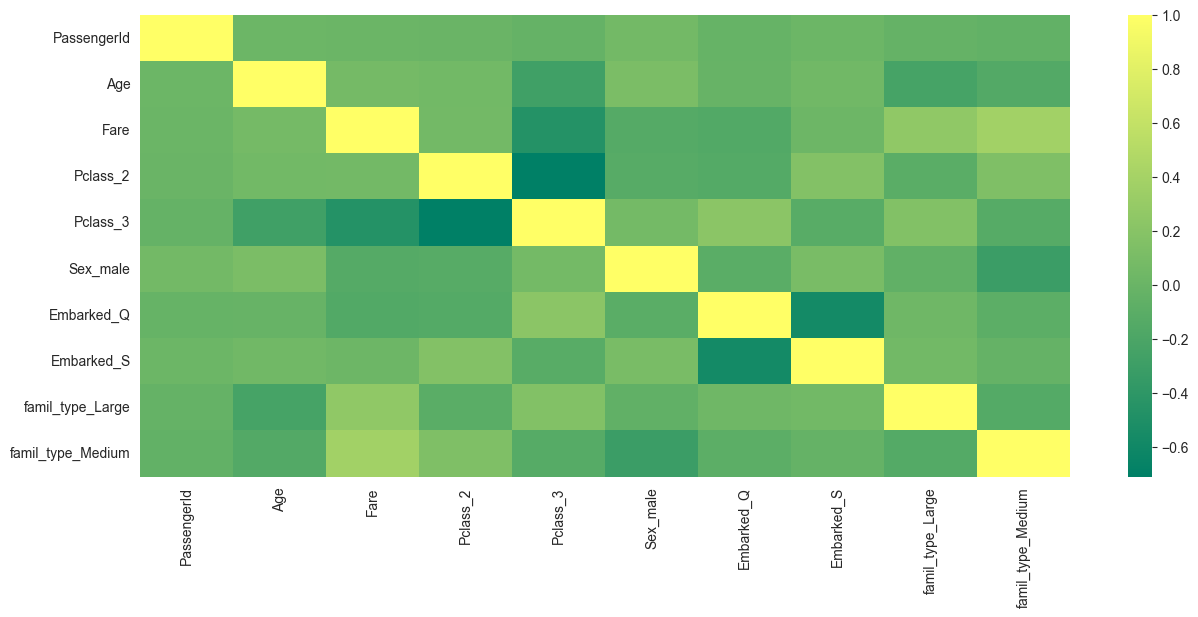

In [344]:
plt.figure(figsize=(15,6))
sns.heatmap(titanic.corr(), cmap='summer')